In [1]:
import tensorflow as tf 

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt


In [2]:
df1=pd.read_csv('heart.csv')
df1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df2=pd.read_csv('o2Saturation.csv')
df2

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


In [4]:
len(df2),len(df1)

(3585, 303)

In [5]:
df2__=df2[:303]

In [6]:
df2__

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
298,97.5
299,97.5
300,97.5
301,97.5


In [7]:
df1['O2saturation']=df2__
df1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,O2saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,97.5
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,97.5
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,97.5
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,97.5


In [8]:
df1.isna().any()

age             False
sex             False
cp              False
trtbps          False
chol            False
fbs             False
restecg         False
thalachh        False
exng            False
oldpeak         False
slp             False
caa             False
thall           False
output          False
O2saturation    False
dtype: bool

In [9]:
df1.isnull().any()

age             False
sex             False
cp              False
trtbps          False
chol            False
fbs             False
restecg         False
thalachh        False
exng            False
oldpeak         False
slp             False
caa             False
thall           False
output          False
O2saturation    False
dtype: bool

In [10]:
x=df1.drop('output',axis=1)
y=df1['output']
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,O2saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,97.5
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,97.5
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,97.5
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,97.5


In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_label,test_label=train_test_split(x,y,random_state=32,test_size=0.3)

In [13]:
len(train_data),len(train_label),len(test_data),len(test_label)

(212, 212, 91, 91)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train_data_norm=sc.fit_transform(train_data)
test_data_norm=sc.fit_transform(test_data)

In [15]:
model=tf.keras.Sequential([tf.keras.layers.Dense(4,activation='relu'),tf.keras.layers.Dense(4,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model.fit(train_data_norm,train_label,epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 2ms/step - loss: 0.7401 - accuracy: 0.5377
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7236 - accuracy: 0.5472
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7099 - accuracy: 0.5755
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.5896
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5991
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.6038
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6673 - accuracy: 0.6226
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.6368
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6518 - accuracy: 0.6509
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.6651
Epoch 11/100
7/7 [===========

7/7 [==============================] - 0s 2ms/step - loss: 0.2845 - accuracy: 0.8915
Epoch 85/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2833 - accuracy: 0.8915
Epoch 86/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2821 - accuracy: 0.8915
Epoch 87/100
7/7 [==============================] - 0s 3ms/step - loss: 0.2810 - accuracy: 0.8962
Epoch 88/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2796 - accuracy: 0.8962
Epoch 89/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2783 - accuracy: 0.8962
Epoch 90/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2774 - accuracy: 0.8962
Epoch 91/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2761 - accuracy: 0.8962
Epoch 92/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2750 - accuracy: 0.8962
Epoch 93/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2739 - accuracy: 0.8962
Epoch 94/100
7/7 [===============

In [16]:
model.evaluate(test_data_norm,test_label)

3/3 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8681


[0.3926531672477722, 0.8681318759918213]

In [17]:
test_data_norm[3]

array([ 1.39082114, -1.58113883,  0.97361012,  0.77399546,  0.63298639,
       -0.47930129, -0.9956553 ,  0.10536214, -0.58158   , -0.89030552,
       -0.52550895,  0.40479372, -0.58900884,  0.06317407])

In [18]:
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

lm=LogisticRegression()
lm.fit(train_data_norm,train_label)
y_pred_logistic=lm.decision_function(test_data_norm)

sm=SVC(kernel='rbf',random_state=4)
sm.fit(train_data_norm,train_label)
y_pred_sm=sm.decision_function(test_data_norm)

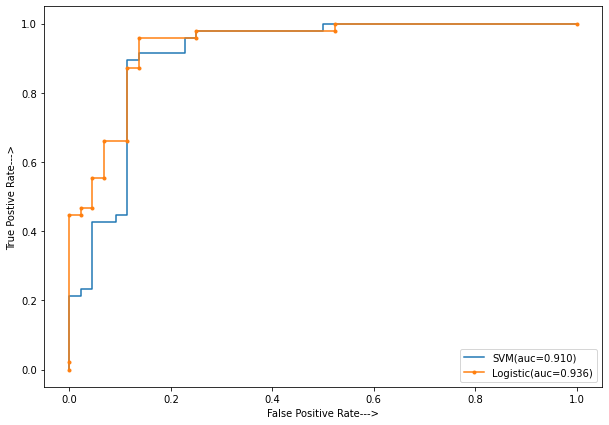

In [19]:
from sklearn.metrics import roc_curve,auc


logistic_fpr,logistic_tpr,threshold=roc_curve(test_label,y_pred_logistic)
auc_logistic=auc(logistic_fpr,logistic_tpr)

svm_fpr,svm_tpr,threshlod=roc_curve(test_label,y_pred_sm)
auc_svm=auc(svm_fpr,svm_tpr)

plt.figure(figsize=(10,7))
plt.plot(svm_fpr,svm_tpr,linestyle='-',label='SVM(auc=%0.3f)'%auc_svm)
plt.plot(logistic_fpr,logistic_tpr,marker='.',label='Logistic(auc=%0.3f)'%auc_logistic)
plt.xlabel('False Positive Rate--->')
plt.ylabel('True Postive Rate--->')
plt.legend()
plt.show()

In [20]:
my_data=train_data.iloc[0]
my_data

age              60.0
sex               1.0
cp                0.0
trtbps          145.0
chol            282.0
fbs               0.0
restecg           0.0
thalachh        142.0
exng              1.0
oldpeak           2.8
slp               1.0
caa               2.0
thall             3.0
O2saturation     97.5
Name: 193, dtype: float64

<ipython-input-21-79c0b1a31f4d>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df1.hist(ax=ax)


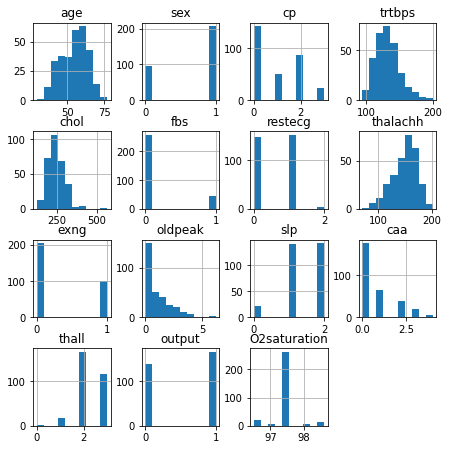

In [21]:
fig=plt.figure(figsize=(7,7))
ax=fig.gca()
df1.hist(ax=ax)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) #wspace and hspace are the important one
plt.show()